In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""
import torch
from torch import nn
import matplotlib.pyplot as plt

In [49]:
class SphericalBessel(nn.Module):
    def __init__(self, k: int = 1, l: int = 0):
        super().__init__()
        self.k = k
        self.l = l

    def forward(self, x):
        jnm1 = torch.sinc(self.k*x/torch.pi)
        jn = (torch.sinc(self.k*x/torch.pi) - torch.cos(self.k*x))/(self.k*x)
        if self.l == 0:
            return torch.sqrt(torch.Tensor([2.0])/torch.pi)*self.k*jnm1
        if self.l == 1:
            return torch.sqrt(torch.Tensor([2.0])/torch.pi)*self.k*jn
        else:
            n = 1
            jnp1 = (2*n+1)*jn/(self.k*x) - jnm1 
            for n in torch.arange(2, self.l):
                print(n)
                jnm1 = jn
                jn = jnp1
                jnp1 = (2*n+1)*jn/(self.k*x) - jnm1
            return torch.sqrt(torch.Tensor([2.0])/torch.pi)*self.k*jnp1

In [194]:
x = torch.linspace(0,3,1000)

In [197]:
class SphericalBessel(nn.Module):
    def __init__(self, k: int = 1, l: int = 0):
        super().__init__()
        self.k = k
        self.l = l

    def forward(self, x):
        x = x*self.k
        y = torch.zeros([self.l]+[s for s in x.shape], dtype=torch.float64)

        lstart = self.l + int(torch.sqrt(torch.Tensor([10*self.l])))
        j2 = torch.zeros_like(x)
        j1 = torch.ones_like(x)

        for i in range(lstart, 0, -1):
            j0 = (2*i+1)/x * j1 - j2
            # print(j0)
            if i-1<self.l:
                y[i-1,...] = j0
            j2 = j1
            j1 = j0

        # print(y)
        true_j0 = torch.sinc(x/torch.pi)
        y = y * true_j0/y[0,...]
        return y

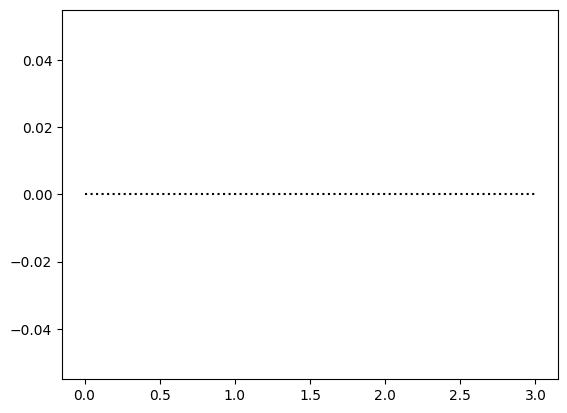

In [202]:
bessel = SphericalBessel(k=1, l=100)
y = bessel(x)
plt.plot(x, y.T)

plt.plot([0,torch.max(x)],[0,0], ':k')

In [61]:
import numpy as np
def bessel_downward(l,x):
    if abs(x)<1e-20:
        res = np.zeros(l+1)
        res[0]=1
        return res
    lstart = l + int(np.sqrt(10*l))
    j2 = 0
    j1 = 1
    res = []
    for i in range(lstart, 0, -1):
        j0 = (2*i+1)/x * j1 - j2
        if i-1<l: res.append(j0)
        j2 = j1
        j1 = j0
    res.reverse()
    true_j0 = np.sin(x)/x
    res = np.array(res) * true_j0/res[0]
    return res

In [69]:
bessel_downward(10,1)

array([8.41470985e-01, 3.01168679e-01, 6.20350520e-02, 9.00658112e-03,
       1.01101581e-03, 9.25611586e-05, 7.15693631e-06, 4.79013420e-07,
       2.82649880e-08, 1.49137650e-09])